In [2]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

In [4]:
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")   # Apple GPU
else:
    device = torch.device("cpu")

print(f"Using device: {device}")

Using device: mps


In [5]:
# Load BLIP model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large").to(device)
model.eval()
print("BLIP model loaded")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


BLIP model loaded


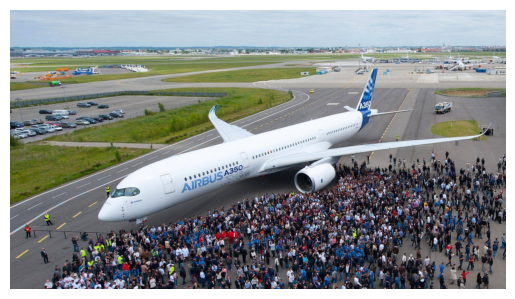

Generated caption: araflane airplane on runway with crowd of people standing around it


In [6]:
# === Step 1: run BLIP on a single image ===

# change this to a real image on your machine
image_path = "example_img.jpg"

def load_image(path):
    """Load an image from disk and convert to RGB."""
    img = Image.open(path).convert("RGB")
    return img

# load and show the image
raw_image = load_image(image_path)
plt.imshow(raw_image)
plt.axis("off")
plt.show()

# prepare inputs for BLIP
inputs = processor(raw_image, return_tensors="pt").to(device)

# generate a caption
with torch.no_grad():
    output_ids = model.generate(
        **inputs,
        max_new_tokens=30,   # you can adjust caption length later
    )

# decode token IDs back to text
caption = processor.decode(output_ids[0], skip_special_tokens=True)
print("Generated caption:", caption)


In [1]:
#Hallo2